# Desafio 3 - Grupo 3

 -------------- Insertar AQUI descripcion de desafio -----------

In [6]:
import numpy as np
import pandas as pd
import geopandas as gpd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

import re
pd.set_option('display.float_format', lambda x: '%.2f' % x)


## DESCRIPCIÓN DE VARIABLES
A continuación se detallan las variables incluidas en la base con una breve descripción de las mismas.

- ID_DATOS_ABIERTOS_LEGAJO Código identificador del legajo al que pertenece la persona afectada
- ID_DATOS_ABIERTOS_PERSONA Código identificador de la persona afectada
- AÑO Año en el que fue realizada la presentación
- MES Mes en el que fue realizada la presentación
- INGRESO Indica por quién o a través de qué institución fue derivada a la OVD
- LEG_TERCERA Identifica si el legajo al que pertenece la persona afectada fue iniciado por una tercera persona
- SEXO_GENERO Indica el sexo/género de la persona afectada
- GRUPO_EDAD Indica el grupo de edad de la persona afectada
- EDAD Edad de la persona afectada
- NACIONALIDAD Nacionalidad de la persona afectada
- DOMICILIO_PROVINCIA Provincia en la que se domicilia la persona afectada
- BARRIO Barrio en el que se domicilia la persona afectada
- COMUNA Comuna en la que se domicilia la persona afectada
- LOCALIDAD_OTRAS_PROVINCIAS Detalle de localidad extra jurisdiccional en la que se domicilia la persona afectada
- NIVEL_INSTRUCCION Nivel de instrucción de la persona afectada
- CONDICIÓN_LABORAL Condición laboral de la persona afectada
- CATEGORIA_OCUPACIONAL Categoría ocupacional de la persona afectada -sólo para personas ocupadas
- CATEGORIA_OCUPACIONAL_DETALLE Detalle de la categoría ocupacional de la persona afectada
- RELACION_AFECTADA_DENUNCIADA Vínculo entre la persona afectada y la persona denunciada
- COHABITAN Indica si la persona afectada y la denunciada cohabitan o cohabitaban hasta una semana previa a la denuncia
- FRECUENCIA_EPISODIOS Indica la frecuencia de los episodios de violencia
- V_FISICA Indica si se registró violencia física en la presentación
- V_PSIC Indica si se registró violencia psicológica en la presentación
- V_ECON Indica si se registró violencia económico patrimonial en la presentación
- V_SEX Indica si se registró violencia sexual en la presentación
- V_SOC Indica si se registró violencia social en la presentación
- V_AMB Indica si se registró violencia ambiental en la presentación
- V_SIMB Indica si se registró violencia simbólica en la presentación 
- EVA_RIESGO Indica la evaluación de riesgo efectuada por los equipos interdisciplinarios de la OVD
- DENUNCIADA_SEXO_GENERO Indica el sexo/género de la persona denunciada
- DENUNCIADA_EDAD Indica el grupo de edad de la persona denunciada
- DENUNCIADA_COND_LAB Indica la condición laboral de la persona denunciada
- DENUNCIADA_NIVEL_INSTRU Indica el nivel de instrucción de la persona denunciada
- JNCIVIL Indica si en dicho legajo hubo derivación a la Justicia Nacional en lo Civil
- JPENAL Indica si en dicho legajo hubo derivación a la Justicia Penal
- ASJURIDICO Indica si en dicho legajo hubo derivación a Asesoramiento Jurídico
- SISTSALUD Indica si en dicho legajo hubo derivación al sistema de salud
- DGM Indica si en dicho legajo hubo derivación a la Dirección General de la
- Mujer (C.A.B.A.)
- CDNNYA Indica si en dicho legajo hubo derivación al Consejo de Derechos de
- Niñas, Niños y Adolescentes (C.A.B.A.)
- INSTNOJUDICIAL Indica si en dicho legajo hubo derivación a instancia no judicial
- JUSPROV Indica si en dicho legajo hubo derivación a la Justicia Provincial
- PROTEGER Indica si en dicho legajo hubo derivación al Programa Proteger (C.A.B.A.)
- SZYPDN Indica si en dicho legajo hubo derivación al Servicio Zonal de Promoción y Protección Integral de los derechos de los niños
- DGMREFUGIO Indica si en dicho legajo hubo derivación a la Dirección General de la Mujer – Refugio- (C.A.B.A.)
- ROVD Indica si dicho legajo se reservó en la OVD
- DPMENEINCAP Indica si en dicho legajo hubo derivación a la Defensoría Pública de Menores e Incapaces de la Nación.


<font color="lightblue">Queremos predecir el valor de EVA_RIESGO en funcion de los valores de las otras features </font>

In [7]:
column_names =  [
    "ID_DATOS_ABIERTOS_LEGAJO","ID_DATOS_ABIERTOS_PERSONA",
    "ANO",
    "MES",
    "INGRESO",
    "LEG_TERCERA",
    "SEXO_GENERO",
    "GRUPO_EDAD",
    "EDAD",
    "NACIONALIDAD",
    "DOMICILIO_PROVINCIA",
    "BARRIO",
    "COMUNA",
    "LOCALIDAD_OTRAS_PROVINCIAS",
    "NIVEL_INSTRU",
    "CONDICION_LABORAL",
    "CATEGORIA_OCUPACIONAL",
    "CATEGORIA_OCUPACIONAL_DETALLE",
    "RELACION_AFECTADA_DENUNCIADA",
    "COHABITAN",
    "FRECUENCIA_EPISODIOS",
    "V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB",
    "EVA_RIESGO",
    "DENUNCIADA_SEXO_GENERO",
    "DENUNCIADA_EDAD",
    "DENUNCIADA_COND_LAB",
    "DENUNCIADA_NIVEL_INSTRU",
    "JNCIVIL",
    "JPENAL",
    "ASJURIDICO",
    "SISTSALUD",
    "DGM",
    "CONDNNYA",
    "INSTNOJUDICIAL",
    "JUSPROV",
    "PROTEGER",
    "SZYPDN",
    "DGMREFUGIO",
    "ROVD",
    "DPMENEINCAP"]
df = pd.read_csv('ovddatosabiertos2018-1.csv',sep=';',names=column_names,skiprows=1,encoding = "ISO-8859-1")
df.shape

(15374, 46)

In [8]:
df

,ID_DATOS_ABIERTOS_LEGAJO,ID_DATOS_ABIERTOS_PERSONA,ANO,MES,INGRESO,LEG_TERCERA,SEXO_GENERO,GRUPO_EDAD,EDAD,NACIONALIDAD,...,SISTSALUD,DGM,CONDNNYA,INSTNOJUDICIAL,JUSPROV,PROTEGER,SZYPDN,DGMREFUGIO,ROVD,DPMENEINCAP
0,AABVJuAAmAACMW4ABI,AAASVGAAjAACCziAAJ,2.02,ENERO,FUERZAS DE SEGURIDAD,NO,MUJER,ADULTAS (30-39 AÑOS),31,PARAGUAY,...,SI,NO,NO,NO,NO,NO,NO,NO,NO,NO
1,AABVJuAAmAACMW4ABJ,AAASVGAAjAACC6NAAF,2.02,ENERO,FUERZAS DE SEGURIDAD,NO,MUJER,ADULTAS (50-59 AÑOS),51,ARGENTINA,...,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO
2,AABVJuAAmAACMW4ABJ,AAASVGAAjAACC6NAAH,2.02,ENERO,FUERZAS DE SEGURIDAD,NO,MUJER,NIÑAS/OS (15-17 AÑOS),16,ARGENTINA,...,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO
3,AABVJuAAmAACMW4ABJ,AAASVGAAjAACC6NAAI,2.02,ENERO,FUERZAS DE SEGURIDAD,NO,MUJER,NIÑAS/OS (11-14 AÑOS),14,ARGENTINA,...,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO
4,AABVJuAAmAACMW4ABJ,AAASVGAAjAACC6NAAJ,2.02,ENERO,FUERZAS DE SEGURIDAD,NO,VARON,NIÑAS/OS ( 6-10 AÑOS),9,ARGENTINA,...,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15369,AABVJuAAnAACTbrABl,AAASVGAAoAADtNYAAM,2.02,DICIEMBRE,FUERZAS DE SEGURIDAD,NO,MUJER,NIÑAS/OS ( 0-5 AÑOS),#¡NULO!,ARGENTINA,...,NO,SI,SI,NO,NO,NO,NO,NO,NO,NO
15370,AABVJuAAnAACTaKABT,AAASVGAAoAADtG3AAR,2.02,DICIEMBRE,LINEA 144,NO,MUJER,ADULTAS (50-59 AÑOS),50,PERU,...,SI,NO,SI,NO,NO,NO,NO,NO,NO,NO
15371,AABVJuAAnAACTayABX,AAASVGAAoAADtGrAAI,2.02,DICIEMBRE,DIRECTA,NO,MUJER,ADULTAS (40-49 AÑOS),43,ARGENTINA,...,NO,SI,NO,NO,NO,NO,NO,NO,NO,NO
15372,AABVJuAAnAACTaYABp,AAASVGAAoAADtAWAAM,2.02,DICIEMBRE,PROGRAMA VICTIMAS CONTRA LAS VIOLENCIAS,SI,VARON,NIÑAS/OS ( 0-5 AÑOS),5,ARGENTINA,...,SI,NO,SI,NO,NO,NO,NO,NO,NO,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15374 entries, 0 to 15373
Data columns (total 46 columns):
ID_DATOS_ABIERTOS_LEGAJO         15374 non-null object
ID_DATOS_ABIERTOS_PERSONA        15374 non-null object
ANO                              15374 non-null float64
MES                              15374 non-null object
INGRESO                          15374 non-null object
LEG_TERCERA                      15374 non-null object
SEXO_GENERO                      15374 non-null object
GRUPO_EDAD                       15374 non-null object
EDAD                             15374 non-null object
NACIONALIDAD                     15368 non-null object
DOMICILIO_PROVINCIA              14857 non-null object
BARRIO                           13968 non-null object
COMUNA                           13961 non-null object
LOCALIDAD_OTRAS_PROVINCIAS       889 non-null object
NIVEL_INSTRU                     15293 non-null object
CONDICION_LABORAL                15318 non-null object
CATEGORIA_OC

### Analizamos las relaciones entre las variables
Para ello graficamos distribuciones y scatters, con _hue_ de la variable target. También creamos una matriz de correlación

In [4]:
#elegimos con que features vamos a trabajar
features_columns=[
    #"ID_DATOS_ABIERTOS_LEGAJO","ID_DATOS_ABIERTOS_PERSONA","ANO","MES",
    "INGRESO",
    "LEG_TERCERA",
    "SEXO_GENERO",
    "GRUPO_EDAD",
   # "EDAD",
    "NACIONALIDAD",
    "DOMICILIO_PROVINCIA",
   # "BARRIO",
   # "COMUNA",
   # "LOCALIDAD_OTRAS_PROVINCIAS",
    "NIVEL_INSTRU",
    "CONDICION_LABORAL",
    "CATEGORIA_OCUPACIONAL",
   # "CATEGORIA_OCUPACIONAL_DETALLE",
    "RELACION_AFECTADA_DENUNCIADA",
    "COHABITAN",
    "FRECUENCIA_EPISODIOS",
    "V_FISICA","V_PSIC","V_ECON","V_SEX","V_SOC","V_AMB","V_SIMB",
  ##  "EVA_RIESGO",
    "DENUNCIADA_SEXO_GENERO",
    "DENUNCIADA_EDAD",
    "DENUNCIADA_COND_LAB",
    "DENUNCIADA_NIVEL_INSTRU",
  #  "JNCIVIL","JPENAL","ASJURIDICO","SISTSALUD","DGM","CONDNNYA","INSTNOJUDICIAL","JUSPROV",
  #  "PROTEGER","SZYPDN","DGMREFUGIO","ROVD","DPMENEINCAP"
]

## Analizamos la variable target

In [5]:
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO', nan}

Tiene algo de informacion basura asique la tiramos y volvemos a ver las opciones

In [6]:
df.drop(df.loc[df["EVA_RIESGO"].isna()].index,inplace=True)
df.shape

(15368, 46)

In [7]:
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO'}

## en principio vamos  ahacer la prueba con la evaluacion de riesgo "alta" y "altisima"

In [8]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score

X=pd.get_dummies(df[features_columns],drop_first=1)
y=((df["EVA_RIESGO"]=="ALTO") | (df["EVA_RIESGO"]=="ALTISIMO")).astype("int")
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.30, random_state=1)

def scoreByModel(model,X_train,X_test,y_train,y_test):
    print("Score Train : %.4f " %  model.score(X_train, y_train))
    print("Score Test : %.4f " %  model.score(X_test, y_test))

In [9]:
#X.shape
set(df["EVA_RIESGO"])

{'ALTISIMO', 'ALTO', 'BAJO', 'MEDIO', 'MODERADO'}

## Probemos KNN

In [10]:
from sklearn.model_selection import KFold

def scores_knn(X,y,start,stop,step):
    
    # Voy a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors
    # Para esto voy a generar una lista de diccionarios que después se puede convertir fácilmente en DataFrame
    # Lista de Diccionarios
    
    scores_para_df = []
    
    # range(1,40,5) son los posibles valores de n_neighbors que quiero explorar. Son todos los enteros desde el 1
    # hasta el 40 en saltos de a 5. (Start,Stop,Step)
    
    for i in range(start,stop,step):
        # En cada iteración instanciamos el modelo con un hiperparámetro distinto
        
        model = KNeighborsClassifier(n_neighbors=i)

        # cross_val_scores nos devuelve un array de 5 resultados, uno por cada partición que hizo automáticamente CV  
        
        kf = KFold(n_splits=10, shuffle=True, random_state=10)
        
        cv_scores = cross_val_score(model, X, y, cv=kf)

        # Para cada valor de n_neighbours, creo un diccionario con el valor de n_neighbours y la media y el desvío de los scores.
        
        dict_row_score = {'score_medio':np.mean(cv_scores),'score_std':np.std(cv_scores),'n_neighbours':i}

        # Guardo cada uno en la lista de diccionarios
        
        scores_para_df.append(dict_row_score)
        
    df_scores = pd.DataFrame(scores_para_df)
    df_scores['limite_inferior'] = df_scores['score_medio'] - df_scores['score_std']
    df_scores['limite_superior'] = df_scores['score_medio'] + df_scores['score_std']
    return df_scores

In [11]:
# SON TODAS DUMMIES NO HACE FALTA ESCALAR 
# PERO PROBEMOS!
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

# Descubramos los hiperparametros
df_scores= scores_knn(X_train, y_train, 1, 20, 2)


In [12]:
df_scores

,n_neighbours,score_medio,score_std,limite_inferior,limite_superior
0,1,0.65,0.01,0.64,0.66
1,3,0.66,0.01,0.65,0.68
2,5,0.67,0.01,0.66,0.69
3,7,0.68,0.01,0.67,0.69
4,9,0.68,0.02,0.67,0.70
5,11,0.69,0.01,0.68,0.70
6,13,0.70,0.01,0.69,0.71
7,15,0.70,0.01,0.68,0.71
8,17,0.70,0.01,0.69,0.71
9,19,0.70,0.01,0.69,0.71


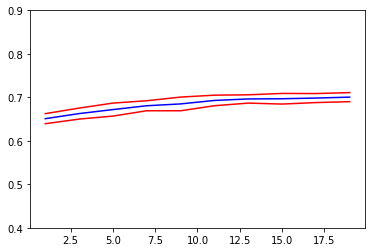

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df_scores['n_neighbours'],df_scores['limite_inferior'],color='r')
plt.plot(df_scores['n_neighbours'],df_scores['score_medio'],color='b')
plt.plot(df_scores['n_neighbours'],df_scores['limite_superior'],color='r')
plt.ylim(0.4, .9);

In [14]:
best_k = df_scores.loc[df_scores.score_medio ==\
                               df_scores.score_medio.max(),'n_neighbours'].values
best_k = best_k[0]
best_k


# Elegimos el modelo óptimo que nos había indicado cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre datos de entrenamiento
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')

In [15]:
scoreByModel(model,X_train,X_test,y_train,y_test)

Score Train : 0.7431 
Score Test : 0.6903 


In [16]:
y_pred = model.predict(X_test)

In [17]:
confusion_matrix(y_test, y_pred)

array([[2222,  579],
       [ 849,  961]])

In [18]:
# Computamos el accuracy score:
accuracy_score(y_test, y_pred)

0.690305790500976

In [19]:
y.mean()

0.38866475793857364

In [20]:
X.mean()

INGRESO_CONSEJO DE DERECHOS DE  NIÑAS/OS Y ADOLESCENTES       0.01
INGRESO_DIRECCION GENERAL DE LA MUJER                         0.02
INGRESO_DIRECTA                                               0.04
INGRESO_FUERZAS DE SEGURIDAD                                  0.33
INGRESO_JUSTICIA                                              0.05
INGRESO_LINEA 144                                             0.06
INGRESO_OTROS                                                 0.08
INGRESO_PROFESIONAL DE LA ABOGACIA                            0.11
INGRESO_PROGRAMA VICTIMAS CONTRA LAS VIOLENCIAS               0.07
INGRESO_REFERENCIAS DE OTRAS PERSONAS                         0.06
INGRESO_SISTEMA DE SALUD                                      0.02
LEG_TERCERA_SI                                                0.10
SEXO_GENERO_VARON                                             0.24
GRUPO_EDAD_ADULTAS (30-39 AÑOS)                               0.22
GRUPO_EDAD_ADULTAS (40-49 AÑOS)                               

In [22]:
model.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=19, p=2,
                     weights='uniform')